## install packages

### font

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/font

In [2]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


### konlpy & wordcloud

In [5]:
!pip install konlpy wordcloud

     |████████████████████████████████| 19.4MB 162kB/s 
     |████████████████████████████████| 92kB 13.4MB/s 
     |████████████████████████████████| 460kB 49.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### mecab

In [6]:
!pip install mecab-python3

     |████████████████████████████████| 491kB 22.0MB/s 


In [7]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [3]:
import nltk
import pandas as pd

## load data

In [4]:
import pandas as pd

DF = pd.read_excel('dataset_final_Revise.xlsx', engine='openpyxl')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40644 entries, 0 to 40643
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sentence     40644 non-null  object 
 1   Emotion      40644 non-null  object 
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   3 non-null      object 
 4   Unnamed: 4   3 non-null      object 
 5   Unnamed: 5   3 non-null      object 
 6   Unnamed: 6   3 non-null      object 
 7   Unnamed: 7   3 non-null      object 
 8   Unnamed: 8   3 non-null      object 
 9   Unnamed: 9   3 non-null      object 
 10  Unnamed: 10  3 non-null      object 
dtypes: float64(1), object(10)
memory usage: 3.4+ MB


In [5]:
sentence = pd.DataFrame()

In [6]:
sentence['original'] = DF['Sentence']

In [7]:
sentence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40644 entries, 0 to 40643
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   original  40644 non-null  object
dtypes: object(1)
memory usage: 317.7+ KB


## morpheme analysis with mecab

In [8]:
from konlpy.tag import Mecab

t= Mecab()

def morphs(text):
  tokens = t.pos(text)
  for i in tokens:
    if i[1] in ['NNG', 'NNP']: ## 고유명사와 일반명사만 return
      return i[0]

In [9]:
result = []
for s in sentence['original']:
  result.append(morphs(s))

In [10]:
result

['게임방',
 '신곡',
 '기대',
 '북',
 '굿',
 '비',
 '암전',
 '선택',
 '커플',
 '판매',
 '하드',
 '기각',
 '운동복',
 '멘토',
 '옛날',
 '비주얼',
 '레전드',
 '길',
 '영화',
 '대박',
 '존',
 '개그',
 '응원',
 '선발',
 '존',
 None,
 '파이팅',
 '개',
 '경질',
 '연출',
 '선수',
 '연기',
 '대한민국',
 '일',
 '축하',
 '감동',
 '개간지',
 '음색',
 '한국',
 '연기',
 '밖',
 '코끝',
 '대한민국',
 '남자',
 '연기',
 '드라마',
 '패션',
 '파이널',
 '미남',
 '티브이',
 '스타',
 '키',
 '누나',
 '길',
 '인생',
 '머리',
 '기대',
 '강',
 '지금',
 '아졸',
 '은퇴',
 '눈빛',
 '개',
 '몸',
 '작가',
 '최고',
 '음색',
 '끝',
 '농부',
 '시즌',
 '개꿀',
 '칼럼',
 '드라마',
 '목',
 '마지막',
 '갑',
 '새끼',
 '연기',
 '파이팅',
 '인류사',
 '국가',
 '미용실',
 '마음',
 '난제',
 '입가',
 '예능',
 '짱',
 '눈',
 None,
 '이번',
 '기존',
 '고난도',
 '리스',
 '공중',
 '행복',
 '뮤직',
 '웜',
 '티브이',
 '그랑프리',
 '세계',
 '모습',
 '유',
 '선수',
 '내년',
 '글',
 '상대',
 '스핀',
 '피겨',
 '이번',
 '하루',
 '형',
 '감독',
 '인생',
 '음색',
 '티저',
 '드라마',
 '조선',
 '급속',
 '형',
 '개',
 '골키퍼',
 '영화',
 '상황',
 '춤',
 '얼굴',
 '파이팅',
 '합류',
 '폐지',
 '캐스팅',
 '패널',
 '대체',
 '지하철',
 '클래스',
 '노래',
 '월드',
 '용기',
 '긍정',
 '프로',
 '레전드',
 '꿀',
 '속',
 '사이다',
 '연기

In [11]:
result = [r for r in result if r]

In [12]:
result

['게임방',
 '신곡',
 '기대',
 '북',
 '굿',
 '비',
 '암전',
 '선택',
 '커플',
 '판매',
 '하드',
 '기각',
 '운동복',
 '멘토',
 '옛날',
 '비주얼',
 '레전드',
 '길',
 '영화',
 '대박',
 '존',
 '개그',
 '응원',
 '선발',
 '존',
 '파이팅',
 '개',
 '경질',
 '연출',
 '선수',
 '연기',
 '대한민국',
 '일',
 '축하',
 '감동',
 '개간지',
 '음색',
 '한국',
 '연기',
 '밖',
 '코끝',
 '대한민국',
 '남자',
 '연기',
 '드라마',
 '패션',
 '파이널',
 '미남',
 '티브이',
 '스타',
 '키',
 '누나',
 '길',
 '인생',
 '머리',
 '기대',
 '강',
 '지금',
 '아졸',
 '은퇴',
 '눈빛',
 '개',
 '몸',
 '작가',
 '최고',
 '음색',
 '끝',
 '농부',
 '시즌',
 '개꿀',
 '칼럼',
 '드라마',
 '목',
 '마지막',
 '갑',
 '새끼',
 '연기',
 '파이팅',
 '인류사',
 '국가',
 '미용실',
 '마음',
 '난제',
 '입가',
 '예능',
 '짱',
 '눈',
 '이번',
 '기존',
 '고난도',
 '리스',
 '공중',
 '행복',
 '뮤직',
 '웜',
 '티브이',
 '그랑프리',
 '세계',
 '모습',
 '유',
 '선수',
 '내년',
 '글',
 '상대',
 '스핀',
 '피겨',
 '이번',
 '하루',
 '형',
 '감독',
 '인생',
 '음색',
 '티저',
 '드라마',
 '조선',
 '급속',
 '형',
 '개',
 '골키퍼',
 '영화',
 '상황',
 '춤',
 '얼굴',
 '파이팅',
 '합류',
 '폐지',
 '캐스팅',
 '패널',
 '대체',
 '지하철',
 '클래스',
 '노래',
 '월드',
 '용기',
 '긍정',
 '프로',
 '레전드',
 '꿀',
 '속',
 '사이다',
 '연기',
 '가왕',
 '콜라

## frequency analysis with nltk

In [13]:
import nltk
from konlpy.corpus import kobill

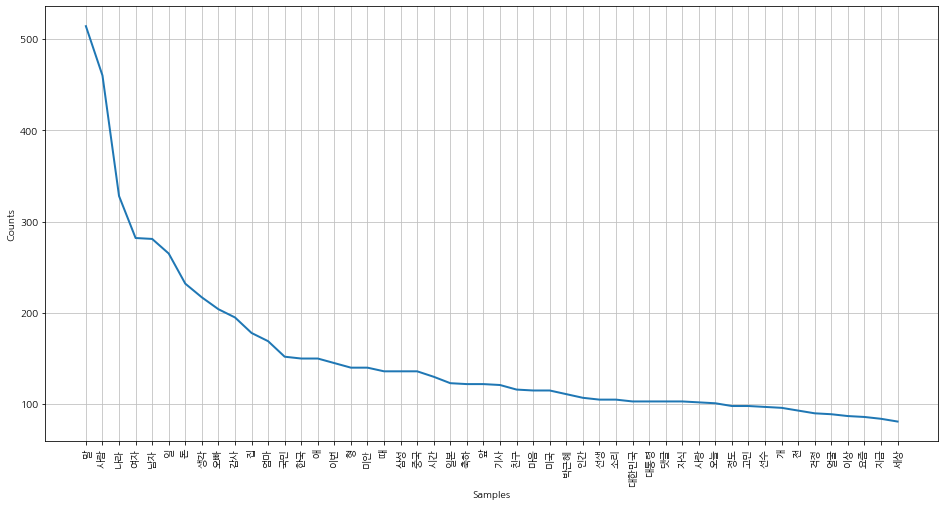

In [14]:
ko = nltk.Text(result, name = 'wordcloud')

plt.figure(figsize=(16,8))
ko.plot(50)
plt.show()

In [18]:
len(ko)

34889

## wordcloud

In [17]:
from wordcloud import WordCloud

data = ko.vocab().most_common(100)

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
wc = WordCloud(font_path=path, background_color='white', width=1500, height=1000).generate_from_frequencies(dict(data))

wc.to_file('wordcloud_mecab.jpg')

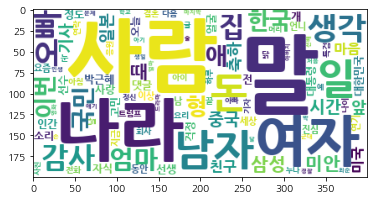

In [16]:
plt.imshow(wc)
plt.show()